In [3]:
rm -rf sample_data/

In [4]:
pwd

'/content'

In [5]:
# upload wheat_bangalore.csv to /content folder

In [6]:
ls

Wheat_Bangalore.csv


In [8]:
!pip install statsmodels
!pip install matplotlib
!pip install pandas
!pip install seaborn

In [13]:
# import statements
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
from pandas import read_csv
import seaborn as sns

In [21]:
series = read_csv("Wheat_Bangalore.csv",usecols=['Date','MeanPrice(Rs./Quintal)'], index_col=0)

In [22]:
series

,MeanPrice(Rs./Quintal)
Date,
2002-01-01,1100
2002-06-01,1200
2002-07-01,1184
2002-08-01,1176
2002-11-01,1150
...,...
2019-06-01,2900
2019-07-01,2900
2019-08-01,2900


In [23]:
print(series.describe())

       MeanPrice(Rs./Quintal)
count              106.000000
mean              1973.783019
std                665.989890
min               1000.000000
25%               1378.250000
50%               1912.000000
75%               2692.750000
max               3105.000000


**Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20d7aed9d0>]],
      dtype=object)

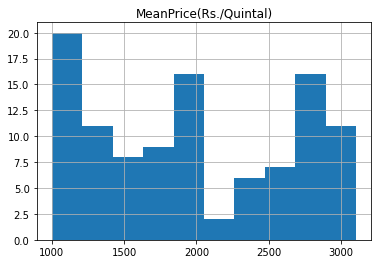

In [24]:
series.hist()

**Line Graph - to observe trend and seasonality**

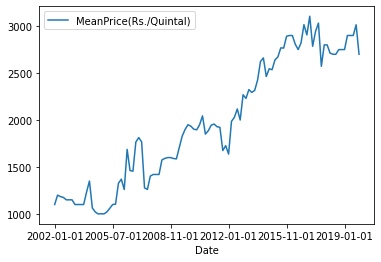

In [25]:
series.plot()

In [78]:
print(series.describe())

       MeanPrice(Rs./Quintal)
count              106.000000
mean              1973.783019
std                665.989890
min               1000.000000
25%               1378.250000
50%               1912.000000
75%               2692.750000
max               3105.000000


**The ACF Plot**

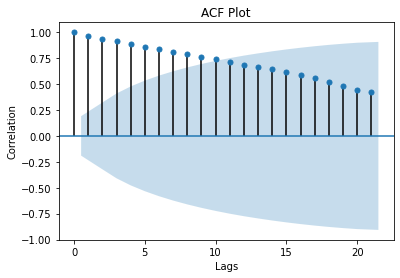

In [36]:
plot_acf(series)
plt.title("ACF Plot")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.show()

It can be observed that there is a observable correlation upto 10 lags

**The PACF Plot**

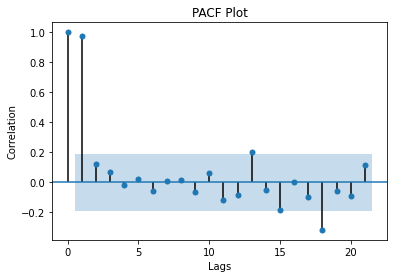

In [35]:
plot_pacf(series)
plt.title("PACF Plot")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.show()

According to the PACF plot, only the 1st lag has significance and directly contributes to the next data point

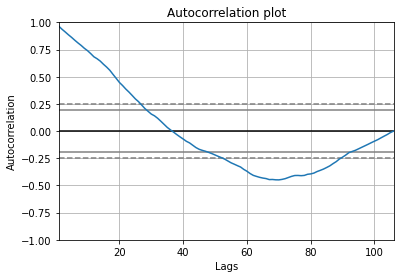

In [33]:
autocorrelation_plot(series)
plt.title("Autocorrelation plot")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()


----------------------------------------------------------------

From "series.plot()" it can be seen that the series is not **stationary** and shows a significant trend

Differencing the data to tranform it to stationary

**FIRST ORDER DIFFERENCE**

In [45]:
first_order_diff_series = series.diff()
first_order_diff_series

,MeanPrice(Rs./Quintal)
Date,
2002-01-01,NaN
2002-06-01,100.0
2002-07-01,-16.0
2002-08-01,-8.0
2002-11-01,-26.0
...,...
2019-06-01,150.0
2019-07-01,0.0
2019-08-01,0.0


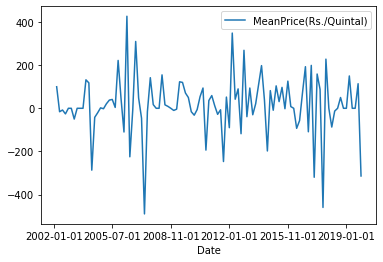

In [46]:
first_order_diff_series.plot()

In [47]:
first_order_diff_series.describe()

,MeanPrice(Rs./Quintal)
count,105.000000
mean,15.238095
std,137.658477
min,-490.000000
25%,-16.000000
50%,0.000000
75%,88.000000
max,427.000000


**SECOND ORDER DIFFERENCE**

In [49]:
second_order_difference_series = first_order_diff_series.diff()
second_order_difference_series

,MeanPrice(Rs./Quintal)
Date,
2002-01-01,NaN
2002-06-01,NaN
2002-07-01,-116.0
2002-08-01,8.0
2002-11-01,-18.0
...,...
2019-06-01,150.0
2019-07-01,-150.0
2019-08-01,0.0


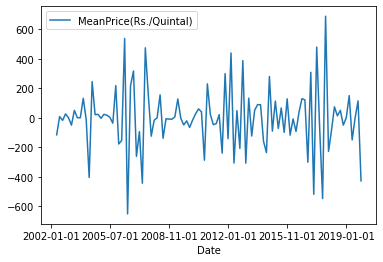

In [50]:
second_order_difference_series.plot()

In [51]:
second_order_difference_series.describe()

,MeanPrice(Rs./Quintal)
count,104.000000
mean,-3.980769
std,216.401325
min,-652.000000
25%,-95.250000
50%,0.000000
75%,88.250000
max,688.000000


**THIRD ORDER DIFFERENCE**

In [53]:
third_order_difference_series = second_order_difference_series.diff()
third_order_difference_series

,MeanPrice(Rs./Quintal)
Date,
2002-01-01,NaN
2002-06-01,NaN
2002-07-01,NaN
2002-08-01,124.0
2002-11-01,-26.0
...,...
2019-06-01,150.0
2019-07-01,-300.0
2019-08-01,150.0


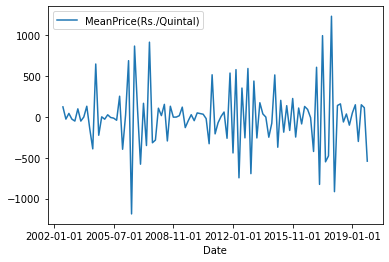

In [54]:
third_order_difference_series.plot()

In [55]:
third_order_difference_series.describe()

,MeanPrice(Rs./Quintal)
count,103.000000
mean,-3.029126
std,381.573637
min,-1189.000000
25%,-215.500000
50%,0.000000
75%,132.000000
max,1236.000000


**FOURTH ORDER DIFFERENCE**

In [57]:
fourth_order_difference_series = third_order_difference_series.diff()
fourth_order_difference_series

,MeanPrice(Rs./Quintal)
Date,
2002-01-01,NaN
2002-06-01,NaN
2002-07-01,NaN
2002-08-01,NaN
2002-11-01,-150.0
...,...
2019-06-01,100.0
2019-07-01,-450.0
2019-08-01,450.0


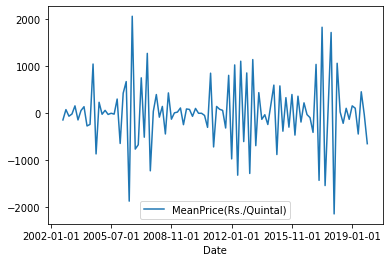

In [58]:
fourth_order_difference_series.plot()

In [59]:
fourth_order_difference_series.describe()

,MeanPrice(Rs./Quintal)
count,102.000000
mean,-6.529412
std,701.799888
min,-2152.000000
25%,-297.500000
50%,-8.000000
75%,277.750000
max,2059.000000


Can assume that the first or second order differenced data is good enough to be used in algorithms

**PLOTS with first order difference**

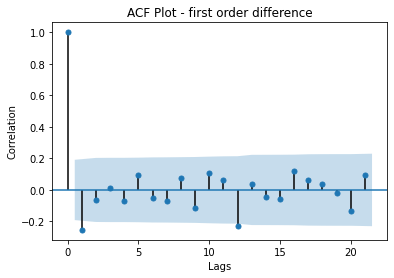

In [64]:
plot_acf(first_order_diff_series[1:])   # starting from 1 because 0th value is Nan
plt.title("ACF Plot - first order difference")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.show()

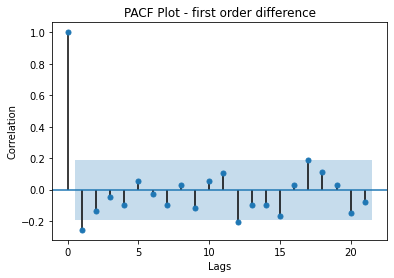

In [68]:
plot_pacf(first_order_diff_series[1:])   # starting from 1 because 0th value is Nan
plt.title("PACF Plot - first order difference")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.show()

**PLOTS with second order difference**

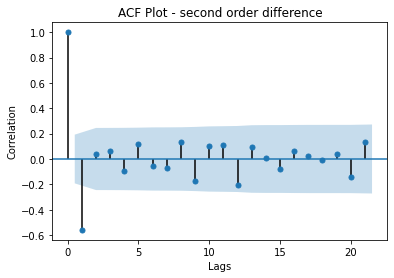

In [69]:
plot_acf(second_order_difference_series[2:])   # starting from 1 because 0th value is Nan
plt.title("ACF Plot - second order difference")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.show()

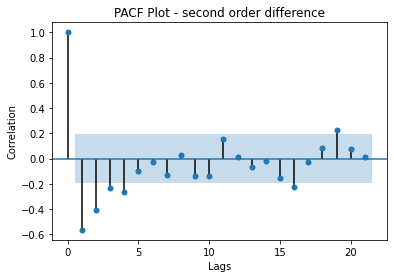

In [70]:
plot_pacf(second_order_difference_series[2:])   # starting from 1 because 0th value is Nan
plt.title("PACF Plot - second order difference")
plt.xlabel("Lags")
plt.ylabel("Correlation")
plt.show()

**THE ADF TEST**

ADF - Augmented Dickey Fuller Test

To check if the timeseries data is stationary or not

Hypothesis:

 - Null hypothesis: Series is not stationary
 - Alternative hypothesis: Series is stationary

In [71]:
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv

In [77]:
timeseries = read_csv("Wheat_Bangalore.csv",usecols=['Date','MeanPrice(Rs./Quintal)'], index_col=0)
ad_fuller_result = adfuller(timeseries['MeanPrice(Rs./Quintal)'])
print(f"ADF Statistics: {ad_fuller_result[0]}")
print(f"p-value: {format(ad_fuller_result[1],'0.30f')}")

ADF Statistics: -0.8191074664289386
p-value: 0.813444862801785184558411856415


The above ADF is not a very large negative number at the same time the p-value also is not very small (<0.5) hence we have to accept the null hypothesis that the raw timeseries data is not stationary.

Performing first order difference and then running the ADF test again - 

In [76]:
first_order_difference_timeseries = timeseries.diff()
ad_fuller_result = adfuller(first_order_diff_series['MeanPrice(Rs./Quintal)'][1:])
print(f"ADF Statistics: {ad_fuller_result[0]}")
print(f"p-value: {format(ad_fuller_result[1],'0.30f')}")

ADF Statistics: -12.919196294981331
p-value: 0.000000000000000000000003907102


Now as the the above ADF statistic is a large negative nimber and the p-value is very very small (<0.5) we can clearly reject the null hypothesis and accept the alternate hypothesis that **the first order differenced timeseries data is stationary**